Questão 2

In [60]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

img = cv.imread('yellowtargets.png',0)
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img.shape

(480, 640)

In [61]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

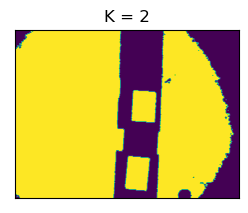

In [62]:
attempts = 10
K = 2
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# ret, label, center = cv.kmeans(vectorized, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

kmeans = KMeans(n_clusters=2, random_state=0).fit(vectorized)
ret = kmeans.predict(vectorized)
label = kmeans.labels_
center = kmeans.cluster_centers_

center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.subplot(2, 2, 4)
plt.imshow(result_image)
plt.title('K = ' + str(K))
plt.xticks([])
plt.yticks([])
plt.show()